In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('C:\\Users\\srbhk\\OneDrive\\Documents\\mail_data.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
p=df['Category'].apply(len)
p

0       3
1       3
2       4
3       3
4       3
       ..
5567    4
5568    3
5569    3
5570    3
5571    3
Name: Category, Length: 5572, dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()
df['Category']=en.fit_transform(df['Category'])

In [5]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [6]:
df.duplicated().sum()

415

In [7]:
df=df.drop_duplicates()

In [8]:
df.duplicated().sum()

0

In [9]:
df.shape

(5157, 2)

# #EDA

In [10]:
df['Category'].value_counts()

0    4516
1     641
Name: Category, dtype: int64

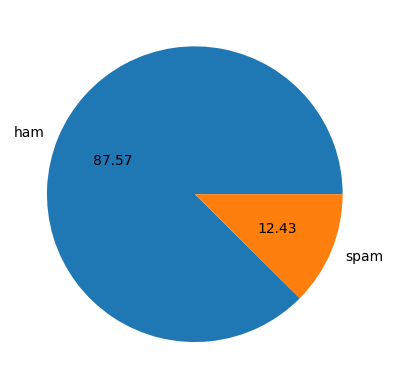

In [11]:
import matplotlib.pyplot as plt
plt.pie(df['Category'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [12]:
!pip install nltk


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import nltk
nltk.download('punkt')
# nltk.download()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\srbhk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
#num_of_char
df['num_charactersd']=df['Message'].apply(len)

C:\Users\srbhk\AppData\Local\Temp\ipykernel_12888\985830041.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_charactersd']=df['Message'].apply(len)


In [15]:
df.head(3)

,Category,Message,num_charactersd
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155


In [16]:
#num_of_words
df['num_words']=df['Message'].apply(lambda x:len(nltk.wordpunct_tokenize(x)))

C:\Users\srbhk\AppData\Local\Temp\ipykernel_12888\1869488969.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['Message'].apply(lambda x:len(nltk.wordpunct_tokenize(x)))


In [17]:
df.head()

,Category,Message,num_charactersd,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,39
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,16


In [18]:
#num_of_sentance
df['num_sentances']=df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\srbhk\AppData\Local\Temp\ipykernel_12888\1509566062.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentances']=df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [19]:
df[['num_charactersd','num_sentances','num_words']].describe()

,num_charactersd,num_sentances,num_words
count,5157.000000,5157.000000,5157.000000
mean,79.103936,1.965290,19.225325
std,58.382922,1.439549,13.987514
min,2.000000,1.000000,1.000000
25%,36.000000,1.000000,9.000000
50%,61.000000,1.000000,15.000000
75%,118.000000,2.000000,28.000000
max,910.000000,38.000000,210.000000


In [20]:
#ham
df[df['Category']==0][['num_charactersd','num_sentances','num_words']].describe()

,num_charactersd,num_sentances,num_words
count,4516.000000,4516.000000,4516.000000
mean,70.869353,1.822852,17.568423
std,56.708301,1.374848,13.870544
min,2.000000,1.000000,1.000000
25%,34.000000,1.000000,9.000000
50%,53.000000,1.000000,13.000000
75%,91.000000,2.000000,23.000000
max,910.000000,38.000000,210.000000


In [21]:
#spam
df[df['Category']==1][['num_charactersd','num_sentances','num_words']].describe()

,num_charactersd,num_sentances,num_words
count,641.000000,641.000000,641.000000
mean,137.118565,2.968799,30.898596
std,30.399707,1.486069,7.943198
min,7.000000,1.000000,2.000000
25%,130.000000,2.000000,28.000000
50%,148.000000,3.000000,32.000000
75%,157.000000,4.000000,36.000000
max,223.000000,9.000000,49.000000


In [22]:
!pip install seaborn


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


<AxesSubplot: xlabel='num_charactersd', ylabel='Count'>

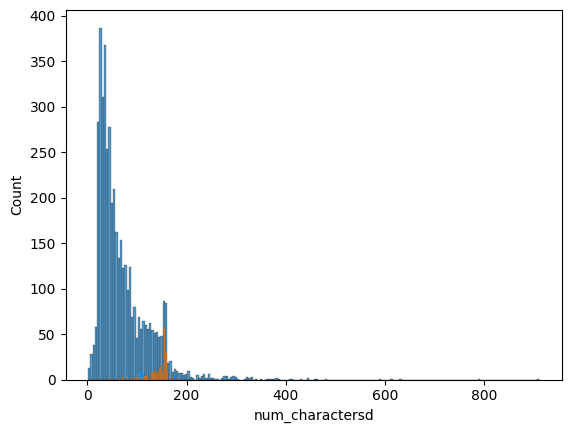

In [23]:
import seaborn as sns

sns.histplot(df[df['Category']==0]['num_charactersd'],bins=200)
sns.histplot(df[df['Category']==1]['num_charactersd'],bins=200)

<AxesSubplot: xlabel='num_sentances', ylabel='Count'>

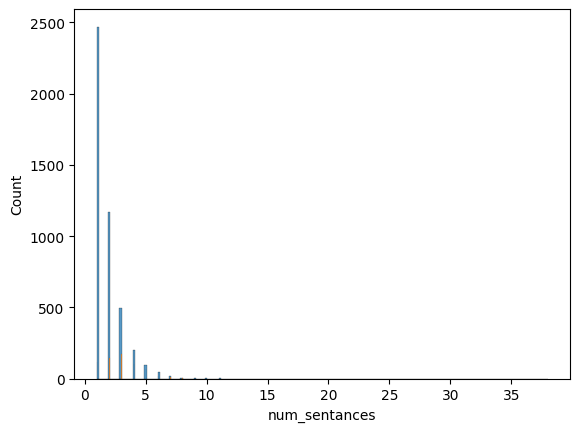

In [24]:
sns.histplot(df[df['Category']==0]['num_sentances'],bins=200)
sns.histplot(df[df['Category']==1]['num_sentances'],bins=200)

<AxesSubplot: xlabel='num_words', ylabel='Count'>

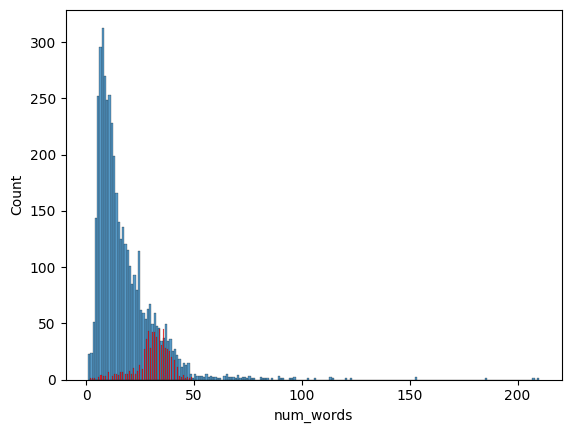

In [25]:
sns.histplot(df[df['Category']==0]['num_words'],bins=200)
sns.histplot(df[df['Category']==1]['num_words'],bins=100,color='red')

#  DATA PREPROCESSING

In [26]:
#lower case
#tokenization
#removeing special characters
#removing stop words and punctuation
#stemming

In [27]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\srbhk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [29]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('dancing')

'danc'

In [30]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [31]:
def text_transform(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():# is alpha numeric
            y.append(i)
            
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [32]:
ps.stem("kaise ho paysa in $ kitna miling")

'kaise ho paysa in $ kitna mil'

In [33]:
df.head(5)

,Category,Message,num_charactersd,num_words,num_sentances
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,39,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,16,1


In [34]:
df['transformed_text']=df['Message'].apply(lambda x:text_transform(x))

C:\Users\srbhk\AppData\Local\Temp\ipykernel_12888\168417052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text']=df['Message'].apply(lambda x:text_transform(x))


In [35]:
df.head(10)

,Category,Message,num_charactersd,num_words,num_sentances,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,39,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,16,1,nah think goe usf live around though
5,1,FreeMsg Hey there darling it's been 3 week's n...,147,45,4,freemsg hey darl 3 week word back like fun sti...
6,0,Even my brother is not like to speak with me. ...,77,18,2,even brother like speak treat like aid patent
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2,per request mell oru minnaminungint nurungu ve...
8,1,WINNER!! As a valued network customer you have...,157,32,5,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...


In [36]:
p=df[['num_charactersd' ,'num_words' ,'num_sentances' ,'transformed_text']]

# p.corr()


C:\Users\srbhk\AppData\Local\Temp\ipykernel_12888\1676820373.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(p.corr(),annot=True)


<AxesSubplot: >

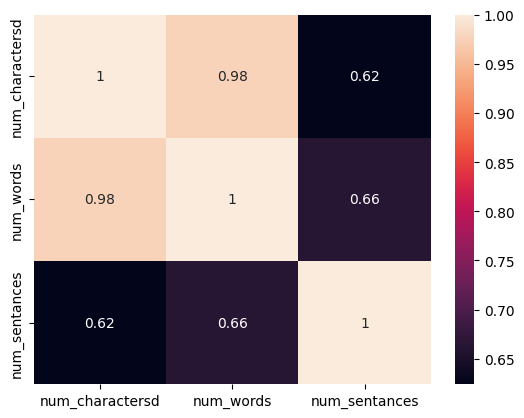

In [37]:
sns.heatmap(p.corr(),annot=True)

In [38]:
df.drop(['Message','num_words'],axis=1,inplace=True)

C:\Users\srbhk\AppData\Local\Temp\ipykernel_12888\42888279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Message','num_words'],axis=1,inplace=True)


In [39]:
df.tail(10)

,Category,num_charactersd,num_sentances,transformed_text
5562,0,96,2,ok lor soni ericsson salesman ask shuhui say q...
5563,0,19,1,ard 6 like dat lor
5564,0,67,1,wait least wednesday see get
5565,0,12,1,huh lei
5566,1,147,1,remind o2 get pound free call credit detail gr...
5567,1,160,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,36,1,ü b go esplanad fr home
5569,0,57,2,piti mood suggest
5570,0,125,1,guy bitch act like interest buy someth els nex...
5571,0,26,2,rofl true name


In [40]:
p=[]
for msg in df[df['Category']==1]['transformed_text'].tolist():
    for i in msg.split():
        p.append(i)
        

In [41]:
p

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [42]:
!pip install collections

ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
from collections import Counter 
Counter(p)

Counter({'free': 184,
         'entri': 21,
         '2': 154,
         'wkli': 9,
         'comp': 8,
         'win': 46,
         'fa': 2,
         'cup': 3,
         'final': 13,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         'text': 122,
         '87121': 2,
         'receiv': 30,
         'question': 9,
         'std': 6,
         'txt': 139,
         'rate': 26,
         'c': 43,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 20,
         'week': 48,
         'word': 21,
         'back': 19,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 60,
         'rcv': 2,
         'winner': 13,
         'valu': 7,
         'network': 26,
         'custom': 39,
         'select': 26,
         'receivea': 1,
         'prize': 78,
         'reward': 7,
         'claim': 96,
         'cal

In [44]:
q=[]
for msg in df[df['Category']==0]['transformed_text'].tolist():
    for i in msg.split():
        q.append(i)

In [45]:
Counter(q)

Counter({'go': 404,
         'jurong': 1,
         'point': 17,
         'avail': 12,
         'bugi': 7,
         'n': 121,
         'great': 96,
         'world': 27,
         'la': 7,
         'e': 77,
         'buffet': 2,
         'cine': 7,
         'got': 239,
         'amor': 1,
         'wat': 103,
         'ok': 208,
         'lar': 37,
         'joke': 14,
         'wif': 27,
         'u': 885,
         'oni': 4,
         'dun': 55,
         'say': 127,
         'earli': 31,
         'hor': 2,
         'c': 58,
         'alreadi': 89,
         'nah': 10,
         'think': 150,
         'goe': 26,
         'usf': 11,
         'live': 23,
         'around': 59,
         'though': 26,
         'even': 76,
         'brother': 18,
         'like': 236,
         'speak': 25,
         'treat': 19,
         'aid': 2,
         'patent': 1,
         'per': 9,
         'request': 6,
         'mell': 1,
         'oru': 2,
         'minnaminungint': 1,
         'nurungu': 1,
         've

In [46]:
!pip install wordcloud


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
# from worldcloud import WordCloud
# wc=WordCloud(width=500,height=600,min_font_size=10,background_color='white')

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [49]:
x=cv.fit_transform(df['transformed_text']).toarray()

In [50]:
x.shape

(5157, 6702)

In [51]:
y=df['Category'].values

In [53]:
y

array([0, 0, 1, ..., 0, 0, 0])

# #split the data in training and testing form

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)


# #Apply machine learning modle

In [55]:
from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB
from sklearn.metrics import r2_score,accuracy_score,mean_squared_error,confusion_matrix

In [56]:
blb= BernoulliNB()
gnb=GaussianNB()
mlb=MultinomialNB()

In [57]:
blb.fit(x_train,y_train)
pre=blb.predict(x_test)
print(r2_score(pre,y_test))
print(accuracy_score(y_test,pre))
print(confusion_matrix(y_test,pre))
print(mean_squared_error(y_test,pre))

0.6899038461538461
0.9718992248062015
[[902   3]
 [ 26 101]]
0.02810077519379845


In [58]:
gnb.fit(x_train,y_train)
pre=gnb.predict(x_test)
print(r2_score(pre,y_test))
print(accuracy_score(y_test,pre))
print(confusion_matrix(y_test,pre))
print(mean_squared_error(y_test,pre))

0.22222752965528225
0.8624031007751938
[[779 126]
 [ 16 111]]
0.1375968992248062


In [59]:
mlb.fit(x_train,y_train)
pre=mlb.predict(x_test)
print(r2_score(pre,y_test))
print(accuracy_score(y_test,pre))
print(confusion_matrix(y_test,pre))
print(mean_squared_error(y_test,pre))

0.8179492833517089
0.9806201550387597
[[896   9]
 [ 11 116]]
0.01937984496124031


In [60]:
from sklearn.svm import SVC
sc=SVC()

In [61]:
sc.fit(x_train,y_train)
pre=sc.predict(x_test)
print(r2_score(pre,y_test))
print(accuracy_score(y_test,pre))
print(confusion_matrix(y_test,pre))
print(mean_squared_error(y_test,pre))

0.65863608798721
0.9709302325581395
[[905   0]
 [ 30  97]]
0.029069767441860465


In [62]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(estimator=SVC(),n_estimators=10, random_state=0)

In [63]:
clf.fit(x_train,y_train)
pre=clf.predict(x_test)
print(r2_score(pre,y_test))
print(accuracy_score(y_test,pre))
print(confusion_matrix(y_test,pre))
print(mean_squared_error(y_test,pre))

0.5981998694561821
0.9670542635658915
[[905   0]
 [ 34  93]]
0.03294573643410853


In [64]:
import pickle
pickle.dump(cv,open('vectorization.pkl','wb'))
pickle.dump(mlb,open('model.pkl','wb'))

In [67]:
df.head(10)

,Category,num_charactersd,num_sentances,transformed_text
0,0,111,2,go jurong point avail bugi n great world la e ...
1,0,29,2,ok lar joke wif u oni
2,1,155,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,49,1,u dun say earli hor u c alreadi say
4,0,61,1,nah think goe usf live around though
5,1,147,4,freemsg hey darl 3 week word back like fun sti...
6,0,77,2,even brother like speak treat like aid patent
7,0,160,2,per request mell oru minnaminungint nurungu ve...
8,1,157,5,winner valu network custom select receivea pri...
9,1,154,3,mobil 11 month u r entitl updat latest colour ...
